#Preparation for Analysis: Import Modulos/Packages/Dataset

In [ ]:
pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ffvt9_qr
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-ffvt9_qr
  Resolved https://github.com/tensorflow/docs to commit a89b900f18bb647a8a5cba40997eacbe801c0fc0
  Preparing metadata (setup.py) ... done


In [ ]:
# for the operating system operations e.g., creating a folder.
import os

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split


In [ ]:
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [ ]:
# Tensorflow untils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
tf.random.set_seed(100) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [ ]:
# read in the dataset
train_ds = pd.read_csv('af2_dataset_training_labeled.csv.gz')
test_ds = pd.read_csv('af2_dataset_testset_unlabeled.csv.gz')

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497166 entries, 0 to 497165
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           497166 non-null  int64  
 1   annotation_sequence  497166 non-null  object 
 2   feat_A               497166 non-null  bool   
 3   feat_C               497166 non-null  bool   
 4   feat_D               497166 non-null  bool   
 5   feat_E               497166 non-null  bool   
 6   feat_F               497166 non-null  bool   
 7   feat_G               497166 non-null  bool   
 8   feat_H               497166 non-null  bool   
 9   feat_I               497166 non-null  bool   
 10  feat_K               497166 non-null  bool   
 11  feat_L               497166 non-null  bool   
 12  feat_M               497166 non-null  bool   
 13  feat_N               497166 non-null  bool   
 14  feat_P               497166 non-null  bool   
 15  feat_Q           

# Data Preprocessing (Copy From Final Model Building)

##Categorical Data Preprocessing

Augment amino acid information

In [ ]:
amino_properties = pd.read_csv("20 Common Amino Acids Properties - Sheet1.csv")
amino_properties['abbr'] = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H',
                            'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W',
                            'Y', 'V']
amino_properties["Sidechain Polarity"] = amino_properties["Sidechain Polarity"].map({"Polar":1, "Non-polar":0})
amino_properties["Sidechain Acidicity/Basicity"] = amino_properties["Sidechain Acidicity/Basicity"].map({"Acidic":1, "Neutral":0, "Basic":-1})
amino_properties["Hydrophobic/Hydrophilic"] = amino_properties["Hydrophobic/Hydrophilic"].map({"Hydrophilic":1, "Neutral":0, "Hydrophobic":-1})
amino_properties.drop('Name', axis = 1, inplace=True)

amino_properties.columns = ["Polarity", "Acidity", "Hydro", "Abbr"]


In [ ]:
# amino_properties.rename({"Sidechain Polarity":"Polarity", "Sidechain Acidicity/Basicity":"Acidity", "Hydrophobic/Hydrophilic":"Hydro"}, 
                        # axis = 1, inplace=True)
train_ds = pd.merge(left = train_ds, right = amino_properties, how = 'left', left_on='annotation_sequence', right_on='Abbr',
         suffixes = ('', ''))
test_ds = pd.merge(left = test_ds, right = amino_properties, how = 'left', left_on='annotation_sequence', right_on='Abbr',
         suffixes = ('', ''))


In [ ]:
train_ds.head()

,Unnamed: 0,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,...,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand,Polarity,Acidity,Hydro,Abbr
0,0,M,False,False,False,False,False,False,False,False,...,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False,0,0,-1,M
1,1,G,False,False,False,False,False,True,False,False,...,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False,0,0,0,G
2,2,Q,False,False,False,False,False,False,False,False,...,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False,1,0,1,Q
3,3,E,False,False,False,True,False,False,False,False,...,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False,1,1,1,E
4,4,P,False,False,False,False,False,False,False,False,...,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False,0,0,0,P


In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 497165
Data columns (total 55 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           497166 non-null  int64  
 1   annotation_sequence  497166 non-null  object 
 2   feat_A               497166 non-null  bool   
 3   feat_C               497166 non-null  bool   
 4   feat_D               497166 non-null  bool   
 5   feat_E               497166 non-null  bool   
 6   feat_F               497166 non-null  bool   
 7   feat_G               497166 non-null  bool   
 8   feat_H               497166 non-null  bool   
 9   feat_I               497166 non-null  bool   
 10  feat_K               497166 non-null  bool   
 11  feat_L               497166 non-null  bool   
 12  feat_M               497166 non-null  bool   
 13  feat_N               497166 non-null  bool   
 14  feat_P               497166 non-null  bool   
 15  feat_Q           

#Data Preprocessing for NN

1. Transform boolean variables to 0 and 1.
2. Drop insignificant variables and categorical variables


In [ ]:
# Change boolean variables feat_[letter], feat_DSSP_[letter], y_Ligand into 0 and 1
# Neural networks need numerical inputs
train_ds.feat_A= train_ds.feat_A.astype(int)
train_ds.feat_C= train_ds.feat_C.astype(int)
train_ds.feat_D= train_ds.feat_D.astype(int)
train_ds.feat_E= train_ds.feat_E.astype(int)
train_ds.feat_F= train_ds.feat_F.astype(int)
train_ds.feat_G= train_ds.feat_G.astype(int)
train_ds.feat_H= train_ds.feat_H.astype(int)
train_ds.feat_I= train_ds.feat_I.astype(int)
train_ds.feat_K= train_ds.feat_K.astype(int)
train_ds.feat_L= train_ds.feat_L.astype(int)
train_ds.feat_M= train_ds.feat_M.astype(int)
train_ds.feat_N= train_ds.feat_N.astype(int)
train_ds.feat_P= train_ds.feat_P.astype(int)
train_ds.feat_Q= train_ds.feat_Q.astype(int)
train_ds.feat_R= train_ds.feat_R.astype(int)
train_ds.feat_S= train_ds.feat_S.astype(int)
train_ds.feat_T= train_ds.feat_T.astype(int)
train_ds.feat_V= train_ds.feat_V.astype(int)
train_ds.feat_W= train_ds.feat_W.astype(int)
train_ds.feat_Y= train_ds.feat_Y.astype(int)
train_ds.feat_DSSP_H= train_ds.feat_DSSP_H.astype(int)
train_ds.feat_DSSP_B= train_ds.feat_DSSP_B.astype(int)
train_ds.feat_DSSP_E= train_ds.feat_DSSP_E.astype(int)
train_ds.feat_DSSP_G= train_ds.feat_DSSP_G.astype(int)
train_ds.feat_DSSP_I= train_ds.feat_DSSP_I.astype(int)
train_ds.feat_DSSP_T= train_ds.feat_DSSP_T.astype(int)
train_ds.feat_DSSP_S= train_ds.feat_DSSP_S.astype(int)
train_ds.y_Ligand= train_ds.y_Ligand.astype(int)

In [ ]:
test_ds.feat_A= test_ds.feat_A.astype(int)
test_ds.feat_C= test_ds.feat_C.astype(int)
test_ds.feat_D= test_ds.feat_D.astype(int)
test_ds.feat_E= test_ds.feat_E.astype(int)
test_ds.feat_F= test_ds.feat_F.astype(int)
test_ds.feat_G= test_ds.feat_G.astype(int)
test_ds.feat_H= test_ds.feat_H.astype(int)
test_ds.feat_I= test_ds.feat_I.astype(int)
test_ds.feat_K= test_ds.feat_K.astype(int)
test_ds.feat_L= test_ds.feat_L.astype(int)
test_ds.feat_M= test_ds.feat_M.astype(int)
test_ds.feat_N= test_ds.feat_N.astype(int)
test_ds.feat_P= test_ds.feat_P.astype(int)
test_ds.feat_Q= test_ds.feat_Q.astype(int)
test_ds.feat_R= test_ds.feat_R.astype(int)
test_ds.feat_S= test_ds.feat_S.astype(int)
test_ds.feat_T= test_ds.feat_T.astype(int)
test_ds.feat_V= test_ds.feat_V.astype(int)
test_ds.feat_W= test_ds.feat_W.astype(int)
test_ds.feat_Y= test_ds.feat_Y.astype(int)
test_ds.feat_DSSP_H= test_ds.feat_DSSP_H.astype(int)
test_ds.feat_DSSP_B= test_ds.feat_DSSP_B.astype(int)
test_ds.feat_DSSP_E= test_ds.feat_DSSP_E.astype(int)
test_ds.feat_DSSP_G= test_ds.feat_DSSP_G.astype(int)
test_ds.feat_DSSP_I= test_ds.feat_DSSP_I.astype(int)
test_ds.feat_DSSP_T= test_ds.feat_DSSP_T.astype(int)
test_ds.feat_DSSP_S= test_ds.feat_DSSP_S.astype(int)

In [ ]:
train_ds.drop(["feat_pLDDT","annotation_atomrec","Unnamed: 0" ,"entry_index",  "Abbr",'coord_X', 'coord_Y', 'coord_Z',"feat_PHI","feat_PSI","feat_TAU","feat_DSSP_7","feat_DSSP_9",'annotation_sequence'], axis = 1, inplace =True)
test_ds.drop(["feat_pLDDT","annotation_atomrec","Unnamed: 0" ,"entry_index",  "Abbr",'coord_X', 'coord_Y', 'coord_Z',"feat_PHI","feat_PSI","feat_TAU","feat_DSSP_7","feat_DSSP_9",'annotation_sequence'], axis = 1, inplace =True)

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 497165
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   feat_A        497166 non-null  int64  
 1   feat_C        497166 non-null  int64  
 2   feat_D        497166 non-null  int64  
 3   feat_E        497166 non-null  int64  
 4   feat_F        497166 non-null  int64  
 5   feat_G        497166 non-null  int64  
 6   feat_H        497166 non-null  int64  
 7   feat_I        497166 non-null  int64  
 8   feat_K        497166 non-null  int64  
 9   feat_L        497166 non-null  int64  
 10  feat_M        497166 non-null  int64  
 11  feat_N        497166 non-null  int64  
 12  feat_P        497166 non-null  int64  
 13  feat_Q        497166 non-null  int64  
 14  feat_R        497166 non-null  int64  
 15  feat_S        497166 non-null  int64  
 16  feat_T        497166 non-null  int64  
 17  feat_V        497166 non-null  int64  
 18  feat

One-hot-encoding

In [ ]:
for col in ['entry']:#,'annotation_sequence']:
  one_hot = pd.get_dummies(train_ds[col])
  # Drop column prefix as it is now encoded
  train_ds = train_ds.drop(col,axis = 1)
  # Join the encoded df
  train_ds = train_ds.join(one_hot)

In [ ]:
for col in ['entry']:#,'annotation_sequence']:
  one_hot = pd.get_dummies(test_ds[col])
  # Drop column prefix as it is now encoded
  test_ds = test_ds.drop(col,axis = 1)
  # Join the encoded df
  test_ds = test_ds.join(one_hot)

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 497165
Columns: 763 entries, feat_A to ZN224_HUMAN
dtypes: float64(5), int64(35), uint8(723)
memory usage: 514.4 MB


In [ ]:
train_ds.head()

,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,...,VGFR1_HUMAN,VGFR2_HUMAN,VRK2_HUMAN,WEE1_HUMAN,WNK1_HUMAN,WNK3_HUMAN,WRN_HUMAN,XPO1_HUMAN,ZGPAT_HUMAN,ZN224_HUMAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into train/test splits.

In [ ]:
# Split the train data into 70% train and 30% test 
train_dataset, temp_test_dataset =  train_test_split(train_ds, test_size=0.3)
# Further Split the test data into half validation data and half test data
valid_dataset,test_dataset = train_test_split(temp_test_dataset,test_size=0.5)

In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset      : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset      : (348016, 763)
 Test dataset       : (74575, 763)
 Validation dataset : (74575, 763)


In [ ]:
# The label is "y_Ligand" of the protein. We will remove them from each dataset split (train, test, validate) and save them into new variables.
# Note: we maintain the order of the labels and data from now on to make sure each example/row is associated with the right label.
train_labels = train_dataset.pop('y_Ligand')
test_labels = test_dataset.pop('y_Ligand')
valid_labels = valid_dataset.pop('y_Ligand')

# Normalize Datasets (after splits!)

In [ ]:
train_stats = train_dataset.describe()
train_stats
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
feat_A,348016.0,0.068322,0.252297,0.0,0.0,0.0,0.0,1.0
feat_C,348016.0,0.020795,0.142698,0.0,0.0,0.0,0.0,1.0
feat_D,348016.0,0.051251,0.220509,0.0,0.0,0.0,0.0,1.0
feat_E,348016.0,0.073359,0.260725,0.0,0.0,0.0,0.0,1.0
feat_F,348016.0,0.036826,0.188334,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
WNK3_HUMAN,348016.0,0.003592,0.059824,0.0,0.0,0.0,0.0,1.0
WRN_HUMAN,348016.0,0.002945,0.054190,0.0,0.0,0.0,0.0,1.0
XPO1_HUMAN,348016.0,0.002135,0.046156,0.0,0.0,0.0,0.0,1.0
ZGPAT_HUMAN,348016.0,0.001080,0.032852,0.0,0.0,0.0,0.0,1.0


In [ ]:
# define a function to normalize the data set. note here we normalized boolean variables, this may/may not be a good idea.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)
normed_test_ds = norm(test_ds)


In [ ]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')


Train/Test/Validate splits: 
Train    : (348016, 762) 
Test     : (74575, 762) 
Validate : (74575, 762) 
Train/Test/Validate labels: 
Train Labels : (348016,) 
Test Labels  : (74575,) 
Test Labels  : (74575,) 


#Build a Neural Network Model:

In [ ]:
# We decalred a function for creating a model.
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 64 Neurons
    model.add(Dense(5, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
    #model.add(Activation('tanh')) # relu or sigmoid.
    
   # model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
   # model.add(Dense(32, Activation('tanh')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    #model.add(Dense(32, Activation('tanh')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
   # model.add(Dense(32, Activation('tanh')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(5, Activation('tanh')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model
    

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()


Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 3815      
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3,851
Trainable params: 3,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test the model before training (this will use the initial weights.) which in fact will generate random values.
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model3.predict(example_batch)
example_result

1/1 [==============================] - 0s 167ms/step


array([[ 1.1620432 ],
       [-0.8257959 ],
       [-0.63232815],
       [-0.24358046],
       [ 0.6298599 ],
       [-0.14997098],
       [ 0.28408274],
       [ 0.07928035],
       [-0.54921925],
       [-0.30343437]], dtype=float32)

# Save checkpoints during training

In [ ]:
# pip install -q pyyaml h5py  # Required to save models in HDF5 format

checkpoint_path = r".\models\protein_binding.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )

# epoch: how many times the dataset was cycled through the module at most. Note: epoch=7 maybe a better model than epoch=8 or 9

# Training the model we built above. (only selected feat_x variables)

In [ ]:
%%time
EPOCHS = 5
#batch_size = 128 # 6 iteration. For thousands of rows choose 32 is fine, for handurds thousands of rows choose 128 or larger. 

model = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


#with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
history = model.fit(
        normed_train_data, 
        train_labels,
       # batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        #steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), 
                 ckpt_callback
                  ],  
    )

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 3815      
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3,851
Trainable params: 3,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10872/10876 [============================>.] - ETA: 0s - loss: 0.5887 - accuracy: 0.7989
Epoch: 0, accuracy:0.7990,  loss:0.5887,  val_accuracy:0.8983,  val_loss:0.4395,  
10876/10876 [==============================] - 24s 2ms/step - loss: 0.5887 - accuracy: 0.7990 - val_

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
0,0.588675,0.798986,0.439490,0.898304,0
1,0.363512,0.928679,0.307647,0.945947,1
2,0.272904,0.954129,0.246180,0.957975,2
3,0.227513,0.959801,0.213044,0.960872,3
4,0.202013,0.961671,0.193531,0.962213,4


#See how the training went by plotting the loss/Accuracy across epochs

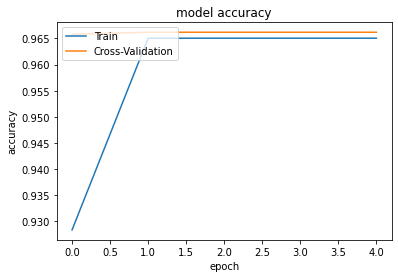

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

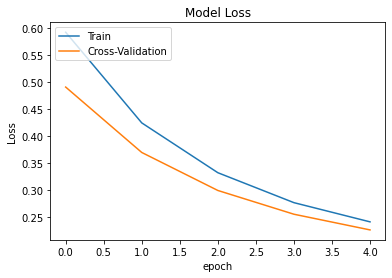

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))


Train Split: 


In [ ]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))


In [ ]:
1-sum(test_labels)/len(test_labels)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


In [ ]:
predict_results = model.predict(test_ds)


ValueError: ignored

In [ ]:
predict_results.to_csv

# Save and load the model (weights)
# https://www.tensorflow.org/tutorials/keras/save_and_load

## a. Manually save weights only (no structure will be saved)

In [ ]:
# a. Manually save weights only (no structure will be saved)
#################################

# Save the weights
model.save_weights('./model_weights/my_checkpoint')

# Create a new model instance
model = build_model2_three_hidden_layers()

# Restore the weights
model.load_weights('./model_weights/my_checkpoint')

# Evaluate the model
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} medv".format(mae))